# <center>Assignment 1: Point to point communications </center>

<center> <img src="https://4.bp.blogspot.com/-u9Rzv7Z8de4/WmDEMM5HPDI/AAAAAAAAAaM/A1bvo-I_lo0lzYIhgA3XLqgmaZnAUfNBQCLcBGAs/w1200-h630-p-k-no-nu/point%2Bto%2Bpoint.png"> </center>

**Student Name**: DOSSEH AMECK GUY-MAX DESIRE

##  Exercise 1: Hello world
 
 • Write an MPI program which prints the message "Hello World"

In [1]:
answer1 = '''from mpi4py import MPI

COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

print(f"Hello World")
''' 

with open('exercise1.py', mode='w') as file:
    file.write(answer1)

In [2]:
!mpirun -n 4 python exercise1.py

Hello World
Hello World
Hello World
Hello World


• Modify your program so that each process prints out both its rank and the total number of
 processes P that the code is running on, i.e. the size of 
`MPI_COMM_WORLD` .

In [3]:
answer2 = '''from mpi4py import MPI

COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

print(f"I am process {RANK} of {SIZE} processes")
''' 

with open('exercise1.py', mode='w') as file:
    file.write(answer2)

In [4]:
!mpirun -n 4 python exercise1.py

I am process 2 of 4 processes
I am process 3 of 4 processes
I am process 1 of 4 processes
I am process 0 of 4 processes


 • Modify your program so that only a single controller process (e.g. rank 0) prints out a message  (very useful when you run with hundreds of processes)

In [5]:
answer3 = '''from mpi4py import MPI

COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

if RANK == 0:
    print(f"I am process {RANK} of {SIZE} processes")
''' 

with open('exercise1.py', mode='w') as file:
    file.write(answer3)

In [6]:
!mpirun -n 4 python exercise1.py

I am process 0 of 4 processes


 • What happens if you omit the final MPI procedure call in your program?

## Exercise 2: Sharing Data
 • Create a program that obtains an integer input from the terminal and distributes it to all the MPI
 processes. Each process must display its rank and the received value. Keep reading values
 until a negative integer is entered.

In [7]:
answer4 = '''
import sys
import time
from mpi4py import MPI

COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

if RANK == 0:
    for line in sys.stdin:
        value = int(line.strip())
        for i in range(1, SIZE):
            COMM.send(value, dest=i, tag=0)
        if value < 0:
            break
        print(f"Process {RANK} received value: {value}")
        time.sleep(3)
else:
    while True:
        value = COMM.recv(source=0, tag=0)
        if value < 0:
            break
        print(f"Process {RANK} received value: {value}")
        time.sleep(3)
'''

with open('exercise2.py', mode='w') as file:
    file.write(answer4)


In [8]:
with open('input.txt', mode='w') as file:
    file.write('1\n2\n3\n4\n5\n-1\n')

In [9]:
!cat input.txt|mpirun -n 4 python exercise2.py

Process 0 received value: 1
Process 1 received value: 1
Process 2 received value: 1
Process 3 received value: 1
Process 0 received value: 2
Process 1 received value: 2
Process 2 received value: 2
Process 3 received value: 2
Process 0 received value: 3
Process 1 received value: 3
Process 2 received value: 3
Process 3 received value: 3
Process 0 received value: 4
Process 1 received value: 4
Process 2 received value: 4
Process 3 received value: 4
Process 0 received value: 5
Process 1 received value: 5
Process 2 received value: 5
Process 3 received value: 5


#  Exercise 3: Ping-Pong
• Implement a ping-pong program using MPI. Process 0 sends an initial message (an integer) to
process 1, which then increments the value and sends it back to process 0. This exchange
happens for a fixed number of iterations. Track and print the value of the integer at each step
along with the sender and receiver's rank.

In [10]:
answer5 = '''
from mpi4py import MPI
import time

COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

n = 0

while n!=8:
    if RANK % 2 == 0:
        COMM.send(n, dest=RANK+1, tag=0)
        # print(f"Process {RANK} sent value: {n}")
        n = COMM.recv(source=RANK+1, tag=0)
        print(f"Process {RANK} received value: {n} from process {RANK+1}")
        time.sleep(3)
    else:
        n = COMM.recv(source=RANK-1, tag=0)
        print(f"Process {RANK} received value: {n} from process {RANK-1}")
        n += 1
        COMM.send(n, dest=RANK-1, tag=0)
        # print(f"Process {RANK} sent value: {n}")
'''

with open('exercise3.py', mode='w') as file:
    file.write(answer5)

In [11]:
!mpirun -n 2 python exercise3.py

Process 0 received value: 1 from process 1
Process 1 received value: 0 from process 0
Process 0 received value: 2 from process 1
Process 1 received value: 1 from process 0
Process 1 received value: 2 from process 0
Process 0 received value: 3 from process 1
Process 0 received value: 4 from process 1
Process 1 received value: 3 from process 0
Process 1 received value: 4 from process 0
Process 0 received value: 5 from process 1
Process 1 received value: 5 from process 0
Process 0 received value: 6 from process 1
Process 1 received value: 6 from process 0
Process 0 received value: 7 from process 1
Process 0 received value: 8 from process 1
Process 1 received value: 7 from process 0


# Exercise 4: Sending in a ring (Broadcast by ring)
• Write a program that takes data from process zero and sends it to all of the other processes by
sending it in a ring. That is, process i should receive the data add the rank of the process to it
then send it to process i+1, until the last process is reached. Assume that the data consists of a single integer. Process zero reads the data from the user. print the process rank and the
value received.

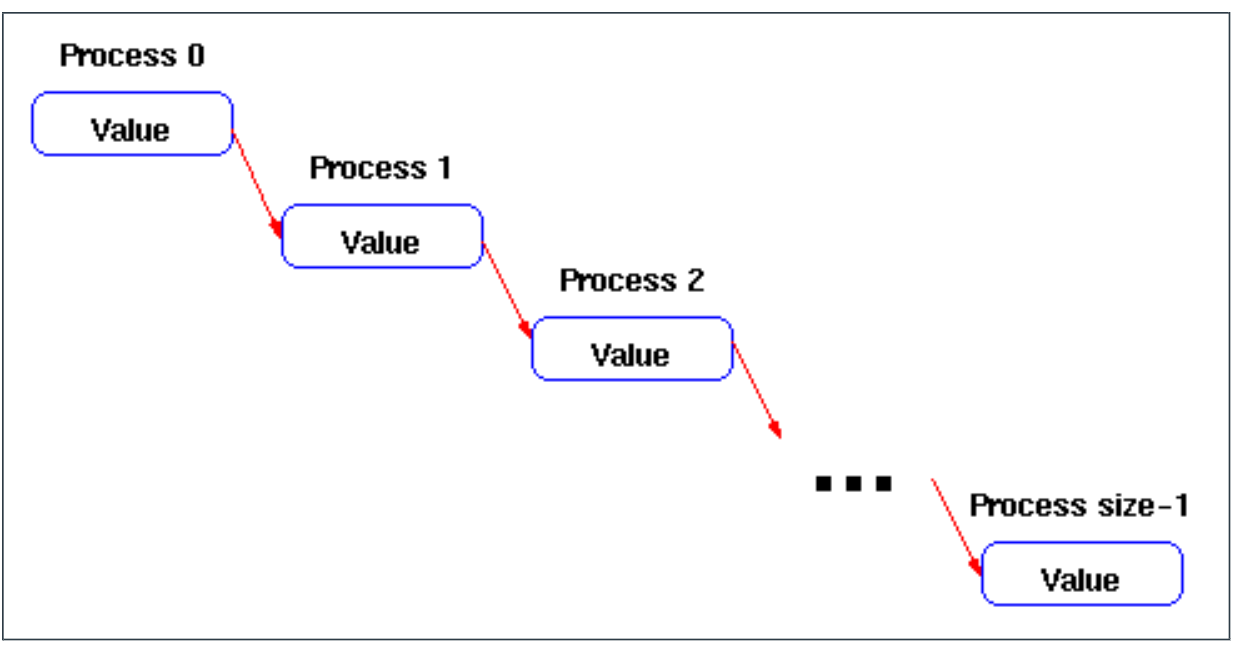

In [12]:
answer6 = '''
from mpi4py import MPI
import time
import sys

COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

if RANK == 0:
    data = int(sys.argv[1])
    COMM.send(data, dest=1, tag=0)
    print(f"Process {RANK} sent value: {data}")

elif RANK < SIZE-1:
    data = COMM.recv(source=RANK-1, tag=0)
    print(f"Process {RANK} received value: {data} from process {RANK-1}")
    data += RANK
    COMM.send(data, dest=RANK+1, tag=0)
    print(f"Process {RANK} sent value: {data}")

else:
    data = COMM.recv(source=RANK-1, tag=0)
    print(f"Process {RANK} received value: {data} from process {RANK-1}")
'''

with open('exercise4.py', mode='w') as file:
    file.write(answer6)

In [13]:
!mpirun -n 4 python exercise4.py 1

Process 0 sent value: 1
Process 1 received value: 1 from process 0
Process 1 sent value: 2
Process 2 received value: 2 from process 1
Process 2 sent value: 4
Process 3 received value: 4 from process 2


# Exercise 5: Solving 1D advection equation
• Implement a parallel solver for the 1D advection equation using the function below:
```
def solve_1d_linearconv(u, un, nt, nx, dt, dx, c):
    for n in range(nt):  
        for i in range(nx): 
            un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    return 0
````

In [14]:
def initial_conditions(L, N):
    import numpy as np
    x = np.linspace(0,L,N)
    u0 = np.array([0 if i<L//2 else 5 for i in x])
    return u0

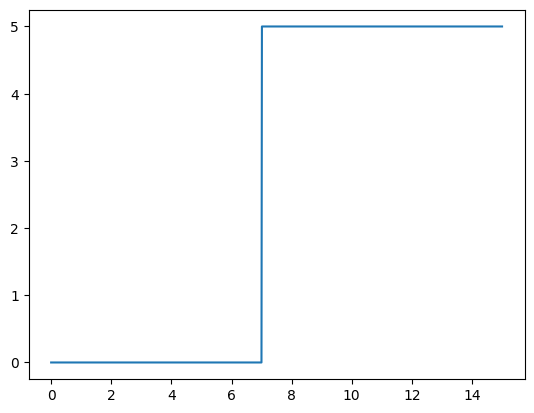

In [15]:
L = 15
nx = 1000
import matplotlib.pyplot as plt 
import numpy as np 
plt.plot(np.linspace(0, L, nx), initial_conditions(L, nx))

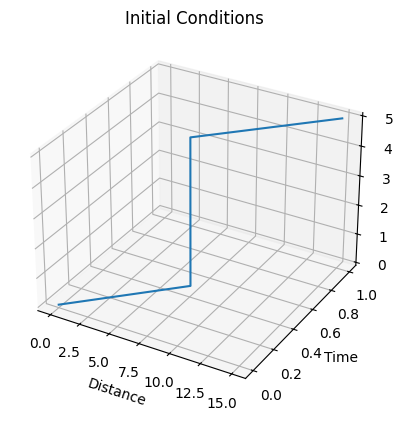

In [16]:
# 3D view of the initial conditions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, L, nx)
nt = 1000
t = np.linspace(0, 1, nt)
z = initial_conditions(L, nx)
ax.plot(x, t, z)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.title('Initial Conditions')
plt.show()

In [17]:
def solve_1d_linearconv(u, un, nt, nx, dt, dx, c):
    t = 0
    while t < nt:  
        un = u.copy()
        for i in range(1, nx): 
            u[i] = un[i] - ((c * dt) / dx) * (un[i] - un[i-1])
            
        t += dt
    return u

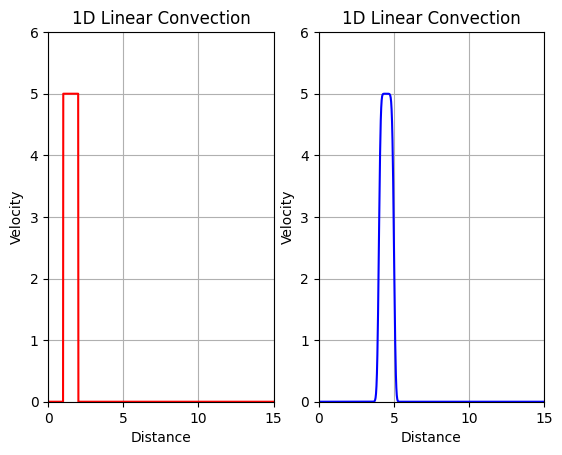

In [18]:
# sequential solution of the linear convection problem
import numpy as np
import matplotlib.pyplot as plt
# Function for the initial conditions
def initial_conditions(x):
    return 5 if 1<=x<=2 else 0

# Parameters and variables
L = 15
nx = 1000
dx = L / (nx - 1)
nt = 3
CFL = 0.8
c = 1
dt =(CFL * dx) / c

x = np.linspace(0,L,nx)
u0 = np.array([initial_conditions(i) for i in x])

un = np.zeros(nx)
u = np.zeros(nx)

for i in range(nx):
    u[i] = u0[i]

# plot the initial solution
plt.subplot(121)
plt.plot(x, u, "-r")
plt.xlabel('Distance')
plt.ylabel('Velocity')
plt.title('1D Linear Convection')
plt.axis([0,15,0,6])
plt.grid()

t = 0
while t < nt:  
    for i in range(nx):
        un[i] = u[i]
    for i in range(1, nx): 
        u[i] = un[i] - ((c * dt) / dx) * (un[i] - un[i-1])
        
    t += dt
    
    
    

# plot the final solution
plt.subplot(122)
plt.plot(x, u, "-b")
plt.xlabel('Distance')
plt.ylabel('Velocity')
plt.title('1D Linear Convection')
plt.axis([0,15,0,6])
plt.grid() 


**Pseudocode**

```
1. Initialize MPI
2. Get the rank and size of the current process
3. Define the parameters: L, nt, nx, x, dt, dx, CFL,  c
4. Calculate the local size of the array for each process: local_nx = nx / size
5. Create function initial_condition(x), and array global_u of size nx
6. Create arrays u, un with size local_nx + 2 (to store ghost cells)
7. Initialize the array global_u
8. Send data from global_u to u, and un using point to point communication
9. Create arrays sendbuf, recvbuf with size local_nx (to store local values)
10. Create a loop for n in range(nt):
    11. Exchange ghost cell values with neighboring processes
        12. If rank > 0:
            - send u[1] to rank - 1
            - receive recvbuf[0] from rank - 1
        13. If rank < size - 1:
            - send u[local_nx] to rank + 1
            - receive recvbuf[local_nx+1] from rank + 1
    14. Update the interior cells of u using the advection equation
        15. For i in range(1, local_nx + 1):
            - un[i] = u[i]
            - u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    16. Gather all values of u to process 0 using point-to-point communication
        17. If rank > 0:
            - send u[1:local_nx] to rank 0
        18. If rank == 0:
            - receive u[1:local_nx] from each process
19. Finalize MPI
```


In [19]:
%%writefile exercise5.py

# Libraries Import
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI
import sys, time

# MPI Initialization
COMM = MPI.COMM_WORLD
SIZE = COMM.Get_size()
RANK = COMM.Get_rank()

# Function for the initial conditions
def initial_conditions(x):
    return 5 if x>=2 else 0

# Parameters and variables
L = 15
nx = 500
dx = L / (nx - 1)
nt = 6
CFL = 1
c = 1
dt =(CFL * dx) / c

# Initial conditions
if RANK == 0:
    x = np.linspace(0,L,nx)
    u0 = np.array([initial_conditions(i) for i in x])
    
    local_nx = nx // SIZE
    local_x = x[RANK*local_nx:(RANK+1)*local_nx]
    local_u0 = u0[RANK*local_nx:(RANK+1)*local_nx]
    local_u = np.zeros(local_nx)
    for i in range(local_nx):
        local_u[i] = local_u0[i]
    
    # Split the u0 in arrays of size local_nx in list comprehension
    u0_split = [u0[i*local_nx:(i+1)*local_nx] if i!= SIZE-1 else u0[i*local_nx:] for i in range(SIZE)]
    local_x_split = [x[i*local_nx:(i+1)*local_nx] if i!= SIZE-1 else x[i*local_nx:] for i in range(SIZE)]
    
    # print size of each array in u0_split
    # for index, array in enumerate(u0_split):
    #     print(f"Process {index} has {len(array)} elements")
        
    # Send splitted arrays to each process
    for i in range(1, SIZE):
        COMM.send(u0_split[i], dest=i, tag=0)
        COMM.send(local_x_split[i], dest=i, tag=1)
else:
    # receive the splitted array
    local_x = COMM.recv(source=0, tag=1)
    local_u0 = COMM.recv(source=0, tag=0)
    local_nx = len(local_u0)
    local_u = np.zeros(local_nx)
    for i in range(local_nx):
        local_u[i] = local_u0[i]

if RANK == 0:
    fig, axs = plt.subplots(1, SIZE+1, figsize=(50, 20))
    

# Plot the initial solution
if RANK == 0:
    axs[0].plot(x, u0, "-r")
    axs[0].set_xlabel('Distance')
    axs[0].set_ylabel('Velocity')
    axs[0].set_title('initial', fontsize=16)
    axs[0].set_xlim([0,14])
    axs[0].set_ylim([0,6])
    axs[0].grid()

    # Plot the local initial conditions
    axs[1].plot(local_x, local_u, "-*b")
    axs[1].set_xlabel('Distance')
    axs[1].set_ylabel('Velocity')
    axs[1].set_title(f'{RANK}', fontsize=16)
    axs[1].set_xlim([0,14])
    axs[1].set_ylim([0,6])
    axs[1].grid()
else:
    # subplot
    fig, ax = plt.subplots(1, 1)
    # Plot the local initial conditions
    # print(f"Plotting process {RANK}")
    ax.plot(local_x, local_u, "-+g")
    ax.set_xlabel('Distance')
    ax.set_ylabel('Velocity')
    ax.set_title(f'{RANK}', fontsize=16)
    ax.set_xlim([0,14])
    ax.set_ylim([0,6])
    ax.grid()
    
    # send ax to process 0
    COMM.send(ax, dest=0, tag=5)
    
if RANK == 0:
    for i in range(1, SIZE):
        ax = COMM.recv(source=i, tag=5)
        lines = ax.get_lines()
        for line in lines:
            x_data = line.get_xdata()
            y_data = line.get_ydata()
            
        axs[i+1].plot(x_data, y_data, "-*b")
        axs[i+1].set_title(f'{i}', fontsize=16)
        axs[i+1].set_xlim([0,14])
        axs[i+1].set_ylim([0,6])
        axs[i+1].grid()
    fig.suptitle('Initial Conditions', fontsize=16)
    # update layout
    fig.tight_layout()
    fig.savefig(f'initial_conditions_split.png')
    
    
# pad local_u for processes 1 to size - 1 at the beginning with a ghost cell to hold the value at the end of the previous process local_u
if RANK != 0:
    local_u = np.pad(local_u, (1, 0), 'edge')
    
# Solve the problem
start_time = time.time()
t = 0
    
un = np.zeros(local_nx)
    
while t <= nt:  
    for i in range(local_nx):
        un[i] = local_u[i]
    for i in range(1, local_nx): 
        local_u[i] = un[i] - ((c * dt) / dx) * (un[i] - un[i-1])
    t += dt
    
    # send the value at the end of the local_u to the next process
    if RANK == 0:
        COMM.send(local_u[-1], dest=RANK+1, tag=100)
    elif RANK != SIZE-1:
        COMM.send(local_u[-1], dest=RANK+1, tag=100)
        local_u[0] = COMM.recv(source=RANK-1, tag=100)
    else:
        local_u[0] = COMM.recv(source=RANK-1, tag=100)
    # if RANK == 0:
    #     COMM.send(local_u[-1], dest=RANK+1, tag=100)
    # elif RANK != SIZE-1:
    #     local_u[0] = COMM.sendrecv(sendobj=local_u[-1], dest=RANK+1, sendtag=100, source=RANK-1, recvtag=100)
    # else:
    #     local_u[0] = COMM.recv(source=RANK-1, tag=100)
    

# Concatenate results to process 0
if RANK != 0:
    COMM.send(local_u[1:], dest=0, tag=98)
else:
    u_final = np.array([])
    u_final = np.concatenate((local_u, u_final))
    for i in range(1, SIZE):
        u_final = np.concatenate((u_final, COMM.recv(source=i, tag=98)))

if RANK == 0:
    print(f"Execution time: {time.time() - start_time}")
    # print(x)
    # print(u0)
    # print(u_final)
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    # Plot the final solution
    axs[0].plot(x, u0, "-r")
    axs[0].set_xlabel('Distance')
    axs[0].set_ylabel('Velocity')
    axs[0].set_title('initial', fontsize=16)
    axs[0].set_xlim([0,14])
    axs[0].set_ylim([0,6])
    axs[0].grid()
    
    axs[1].plot(x, u_final, "-b")
    axs[1].set_xlabel('Distance')
    axs[1].set_ylabel('Velocity')
    axs[1].set_title('final', fontsize=16)
    axs[1].set_xlim([0,14])
    axs[1].set_ylim([0,6])
    axs[1].grid()
    fig.suptitle('1D Linear Convection', fontsize=16)
    # update layout
    fig.tight_layout()
    fig.savefig(f'1d_linear_convection_split_{SIZE}.png')

Overwriting exercise5.py


In [20]:
!mpirun -n 3 python exercise5.py

Execution time: 0.06877303123474121


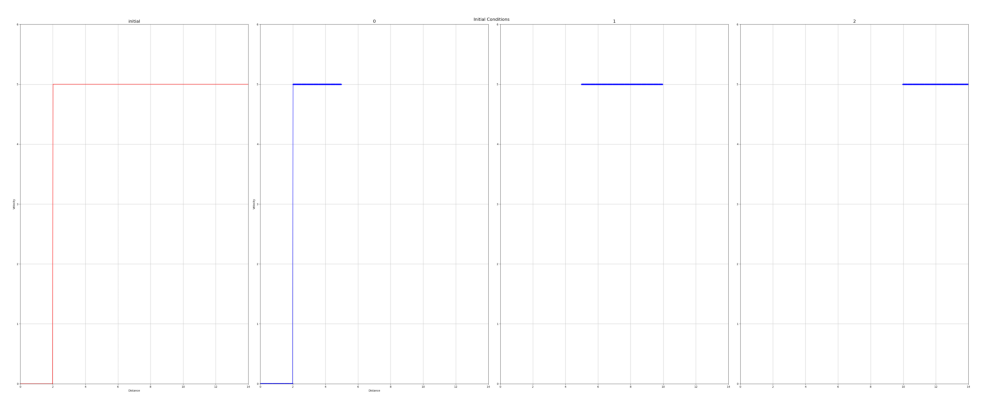

In [21]:
plt.figure(figsize = (20,5)) 
plt.imshow(plt.imread('initial_conditions_split.png'), interpolation='antialiased')
plt.axis('off')
plt.show()

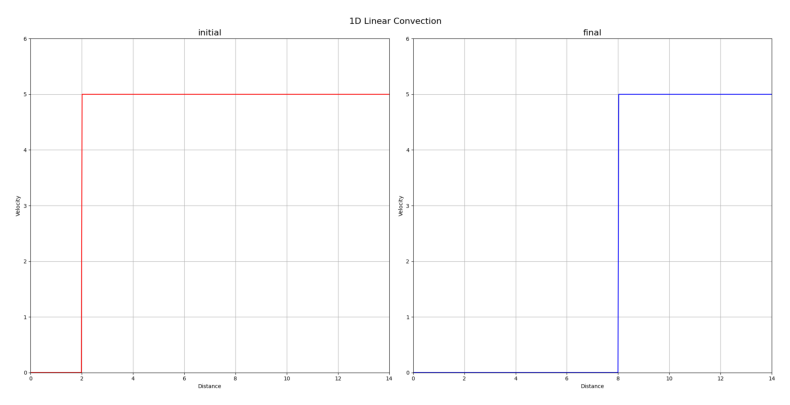

In [22]:
plt.figure(figsize = (20,5)) 
plt.imshow(plt.imread('1d_linear_convection_split_3.png'), interpolation='antialiased')
plt.axis('off')
plt.show()

In [23]:
!mpirun -n 2 python exercise5.py

Execution time: 0.1116335391998291


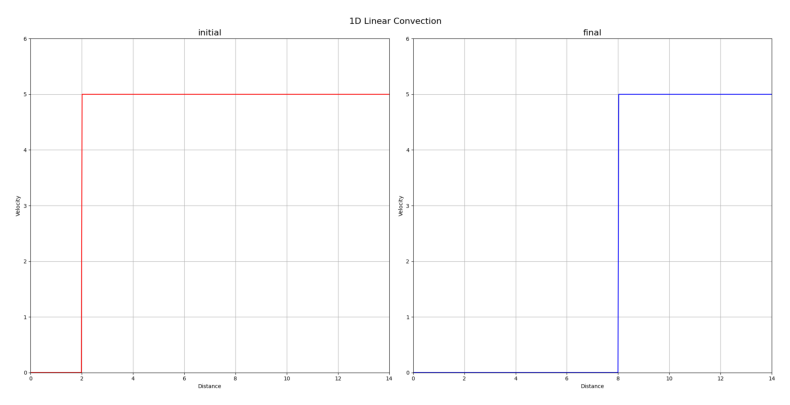

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5)) 

plt.imshow(plt.imread("1d_linear_convection_split_2.png"))
plt.axis('off')
plt.show()

In [25]:
!mpirun -n 3 python exercise5.py

Execution time: 0.07426142692565918


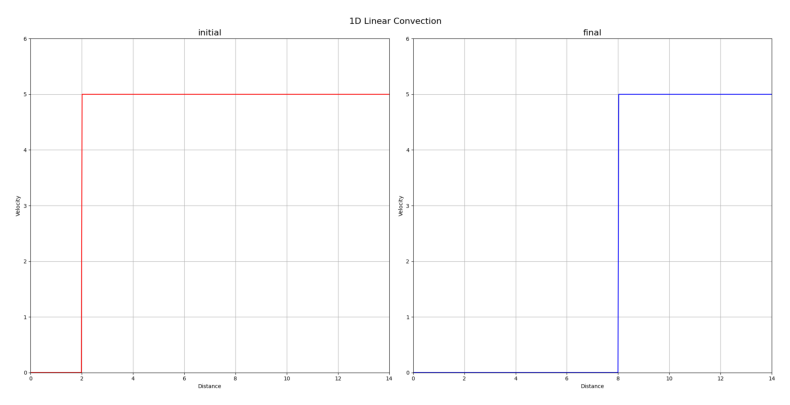

In [26]:
plt.figure(figsize = (20,5)) 
plt.imshow(plt.imread("1d_linear_convection_split_3.png"))
plt.axis('off')
plt.show()

In [27]:
!mpirun -n 4 python exercise5.py

Execution time: 0.21475458145141602


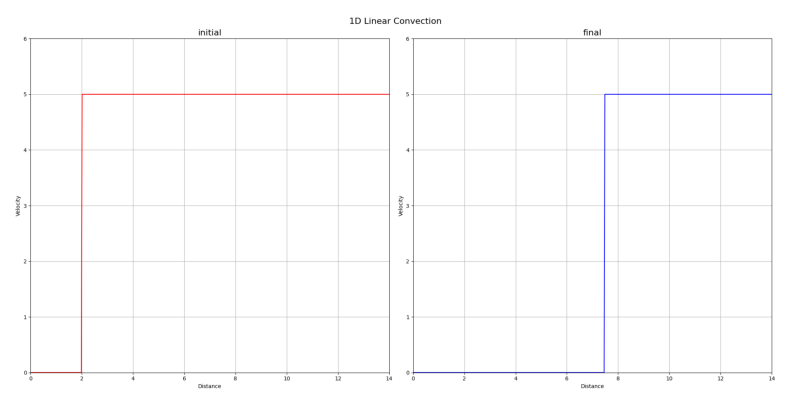

In [28]:
plt.figure(figsize = (20,5)) 
plt.imshow(plt.imread("1d_linear_convection_split_4.png"))
plt.axis('off')
plt.show()

In [29]:
!mpirun -n 5 python exercise5.py

Execution time: 0.0799870491027832


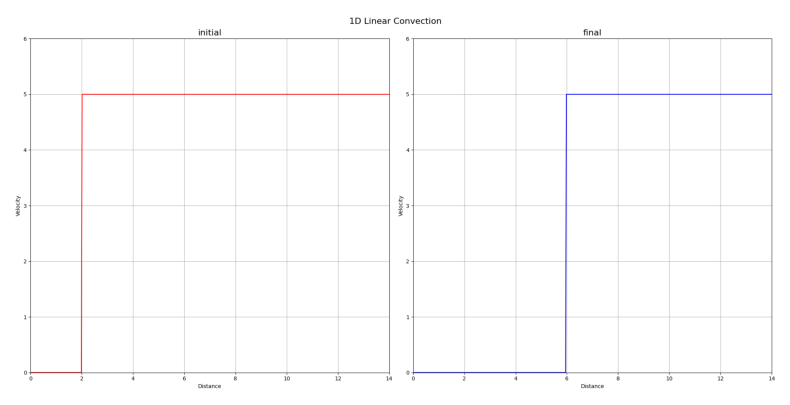

In [30]:
plt.figure(figsize = (20,5)) 
plt.imshow(plt.imread("1d_linear_convection_split_5.png"))
plt.axis('off')
plt.show()

In [31]:
!mpirun -n 6 python exercise5.py

Execution time: 0.08070755004882812


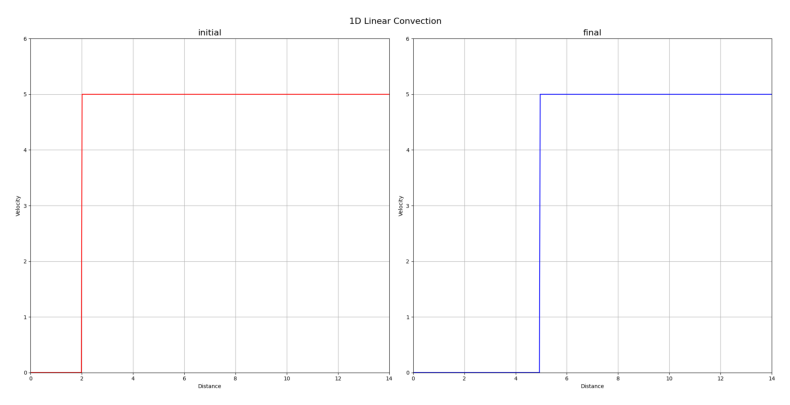

In [32]:
plt.figure(figsize = (20,5)) 
plt.imshow(plt.imread("1d_linear_convection_split_6.png"))
plt.axis('off')
plt.show()

- The time tends to decrease as the number of processes increases
- But the solution is not accurate for execution with more than 4 processes: This is probably due to deadlocks during point to point communication.